# Sample

This sample shows how the lightroot project works. Note important settings are confined to a settings file so that we try
to make the slow batch jobs parameterless. The method names should be self-explantory - we sharpen images, pluck centroids and show a sample of the overlay. This process is carried out in batch to create a dataframe of blobs which is saved to txt files in the cached data folder. Having extracted centroids for all frames, the tracker builds the identities and writes the result to the cached data folder

In [1]:
%matplotlib inline
import lightroot

01/05/2018 16:29:45 INFO:loaded lightroot


# 1 Manually set file templates for processing

In [2]:
pth  ="C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)/"
lightroot.SETTINGS["stack_files"] = pth+"Run0192_tp{:0>3}.tif"
lightroot.SETTINGS["maxint_files"] = pth+"Run0192_tp{}_MIP.tif"

# 2 Loading frames

In [ ]:
sample_time_frame =15
stack = lightroot.io.get_stack(sample_time_frame)
lightroot.io.plotimg(stack)

# 3 Full frame detection routine

In [ ]:
id_ = 115
stack = lightroot.io.get_stack(id_)
out = []
blob_centroids,stack = lightroot.blobs.detect(stack,  display_detections=False,  overlay_original_id=id_,out=out) #sharpen_iter=2, isolate_iter=2,
lightroot.io.overlay_blobs(stack,blob_centroids,out)

# 4 Running batch process

In [ ]:
#lightroot.process("C:/Users/mrsir/Box Sync/uncut/images/083117/149/", log_to_file=False)

# 5 Low-level steps

## isolating roots via lowband

### 2d

01/05/2018 16:29:50 INFO(115):Stack loaded from C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)/Run0192_tp115.tif
01/05/2018 16:29:50 INFO(115):using low band range for 2d data from 95,99, 50 data percentile [0.439, 0.483, 0.358]
01/05/2018 16:29:51 INFO(115):projecting 2d mask to 3d mask...
01/05/2018 16:29:53 INFO(115):using low band range for 3d data from 95,99, 50 data percentile [0.165, 0.222, 0.098]
01/05/2018 16:29:53 INFO(115):using final filter from percentile low band range 0.222
01/05/2018 16:29:53 INFO(115):checking shine @ 682980.00
01/05/2018 16:29:53 WARN(115):bright frame detected. removing bottom agressively
01/05/2018 16:29:53 WARN(115):because clipping was not terribly successfull, I will reduce the threshold value to the low value of 0.08
01/05/2018 16:29:55 INFO(115):applying adaptive cut threshold @ 0.30
01/05/2018 16:29:56 INFO(115):extracted root region with volume 72571200 with non-zero 0.08%


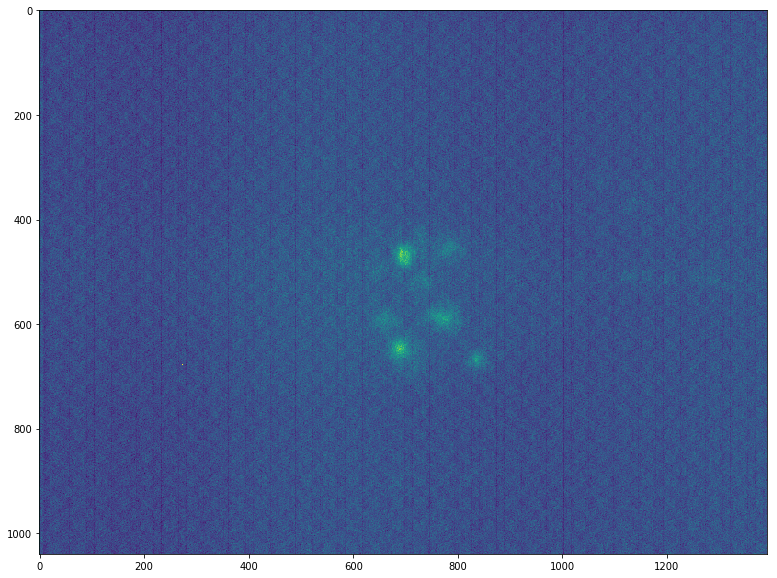

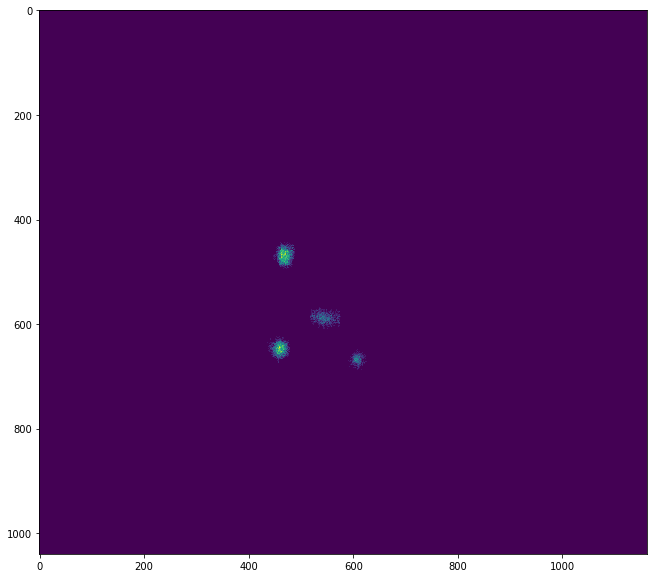

In [3]:
stack = lightroot.io.get_stack(115)
lightroot.io.plotimg(stack)
#im = stack.copy()
stack = lightroot.blobs.low_pass_2d_proj_root_segmentation(stack, find_threshold_val=0.2)
lightroot.io.plotimg(stack)

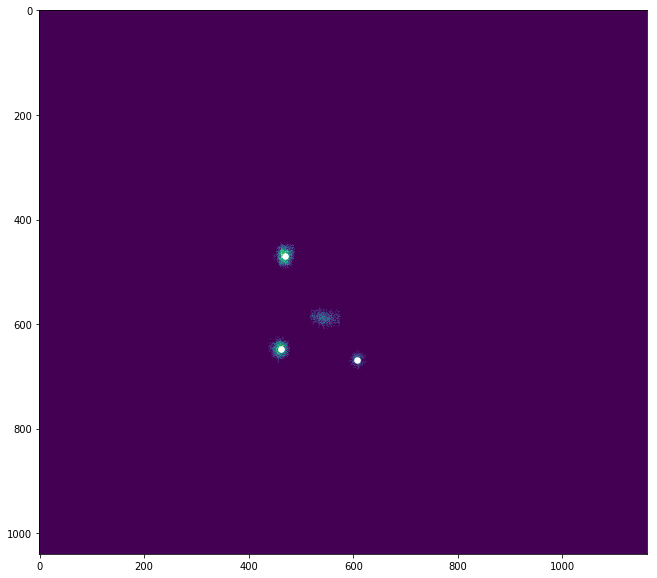

In [4]:
g2 = stack.copy()
g2, blobs = lightroot.blobs.simple_detector(g2)

lightroot.io.overlay_blobs(stack,blobs)

In [ ]:
from scipy.ndimage import maximum_filter
import pandas as pd
from skimage import feature
im = g2.copy()
image_max = maximum_filter(im, size=10, mode='constant')
coordinates = feature.peak_local_max(im, min_distance=5)
df =  pd.DataFrame(coordinates,columns=["z", "y", "x"])
lightroot.io.overlay_blobs(stack,df)

In [ ]:
import numpy as np
import pandas as pd
gap = 0.1
tjreshold = 0.1
im = stack.copy()
im /= im.max()
cuts = np.arange(0.1,1.0,gap)
vals = np.array([np.count_nonzero(im[im>t]) for t in cuts],dtype=np.float)
df = pd.DataFrame(vals, columns=["v"])
df["s"] = df["v"] / df["v"].sum()
df["d"] = df["s"].diff(-2).fillna(method='ffill') 
vals = list(df["d"].values)

df.plot()

In [ ]:
df

### 3d

In [ ]:
# stack= lightroot.blobs.low_pass_root_segmentation(stack)
# lightroot.io.plotimg(stack_sample)

## sharpening root region

In [ ]:
stack = lightroot.blobs.sharpen(stack, iterations=1)
lightroot.io.plotimg(stack)

## isolating blobs in data

In [ ]:
stack = lightroot.blobs.isolate(stack)
ax = lightroot.io.plotimg(stack)

In [ ]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
# display results
import pandas as pd
im = stack.copy()


def peak_centroids(im, size=10, min_distance=10):
    image_max = ndi.maximum_filter(im, size=size, mode='constant')
    coordinates = peak_local_max(im, min_distance=min_distance)
    return pd.DataFrame(coordinates,columns=["z", "y", "x"])

blob_centroids = peak_centroids(im)
lightroot.io.overlay_blobs(stack,blobs_centroids)

## marking centroids

In [ ]:

blobs_centroids = lightroot.blobs.blob_centroids(stack, display=True, max_final_ecc=0.95,min_final_volume=1000, underlying_image=stack)
lightroot.io.overlay_blobs(stack,blobs_centroids)

In [ ]:
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm